In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kdd-cup-1999-data/kddcup.data.gz
/kaggle/input/kdd-cup-1999-data/training_attack_types
/kaggle/input/kdd-cup-1999-data/kddcup.data.corrected
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled.gz
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled.gz
/kaggle/input/kdd-cup-1999-data/corrected.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.names
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent_corrected
/kaggle/input/kdd-cup-1999-data/typo-correction.txt
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data/kddcup.data
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled/kddcup.testdata.unlabeled
/kaggle/input/kdd-cup-1999-data/corrected/corrected
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent/kddcup.testdata.unlabeled_10_percent
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled/kd

# importing the library  

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split,TensorDataset
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import roc_curve,accuracy_score,confusion_matrix,recall_score,precision_score,f1_score, auc, roc_auc_score,classification_report
import seaborn as sns

In [55]:
# cheeking the run time 
def divse():
        if torch.cuda.is_available():
            device = "cuda"
        else:
            device = "cpu"
        print(f"Using device {device}")
        return device
divse()

Using device cpu


'cpu'

<h1>First we will be loading the Training and test data which are kddcup.data_10_percent.gz and kddcup.newtestdata_10_percent_unlabeled.gz</h1>

In [345]:
train= pd.read_csv('../input/kdd-cup-1999-data/kddcup.data_10_percent.gz', compression='gzip', header=0, sep=',', quotechar='"')
train.to_csv('./train.csv')

In [741]:
train.describe()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.0,494020.0,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685232e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,0.001008,0.0,0.0,0.001387,332.286347,292.907133,0.176687,0.791547,232.471230,188.666034
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,0.036482,0.0,0.0,0.037211,213.147129,246.322733,0.380717,0.388190,64.744665,106.040236
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,117.000000,10.000000,0.000000,1.000000,255.000000,46.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,1.000000,255.000000,255.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,1.000000,255.000000,255.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,255.000000,255.000000


In [346]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   0        494020 non-null  int64  
 1   tcp      494020 non-null  object 
 2   http     494020 non-null  object 
 3   SF       494020 non-null  object 
 4   181      494020 non-null  int64  
 5   5450     494020 non-null  int64  
 6   0.1      494020 non-null  int64  
 7   0.2      494020 non-null  int64  
 8   0.3      494020 non-null  int64  
 9   0.4      494020 non-null  int64  
 10  0.5      494020 non-null  int64  
 11  1        494020 non-null  int64  
 12  0.6      494020 non-null  int64  
 13  0.7      494020 non-null  int64  
 14  0.8      494020 non-null  int64  
 15  0.9      494020 non-null  int64  
 16  0.10     494020 non-null  int64  
 17  0.11     494020 non-null  int64  
 18  0.12     494020 non-null  int64  
 19  0.13     494020 non-null  int64  
 20  0.14     494020 non-null  

<h1>First we will be loading the Training and test data which are kddcup.data_10_percent.gz and kddcup.newtestdata_10_percent_unlabeled.gz</h1>

## data preprossing

<h3>We will rename name the coulmns name using the names that were provided here Plus adding the Lables coulmn <h3> http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names

In [605]:
culmn_name=['index','duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment',
'urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login',
'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
'dst_host_rerror_rate','dst_host_srv_rerror_rate','lable']
train = pd.read_csv('./train.csv', header=None, names=culmn_name, low_memory=False)
train=train.dropna()
train=train.drop(['index'], axis=1)

In [ ]:
len(culmn_name)

43

In [ ]:
train.describe()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.0,494020.0,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685232e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,0.001008,0.0,0.0,0.001387,332.286347,292.907133,0.176687,0.791547,232.471230,188.666034
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,0.036482,0.0,0.0,0.037211,213.147129,246.322733,0.380717,0.388190,64.744665,106.040236
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,117.000000,10.000000,0.000000,1.000000,255.000000,46.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,1.000000,255.000000,255.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,1.000000,255.000000,255.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,255.000000,255.000000


In [ ]:
train['lable'].value_counts()

smurf.              280790
neptune.            107201
normal.              97277
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: lable, dtype: int64

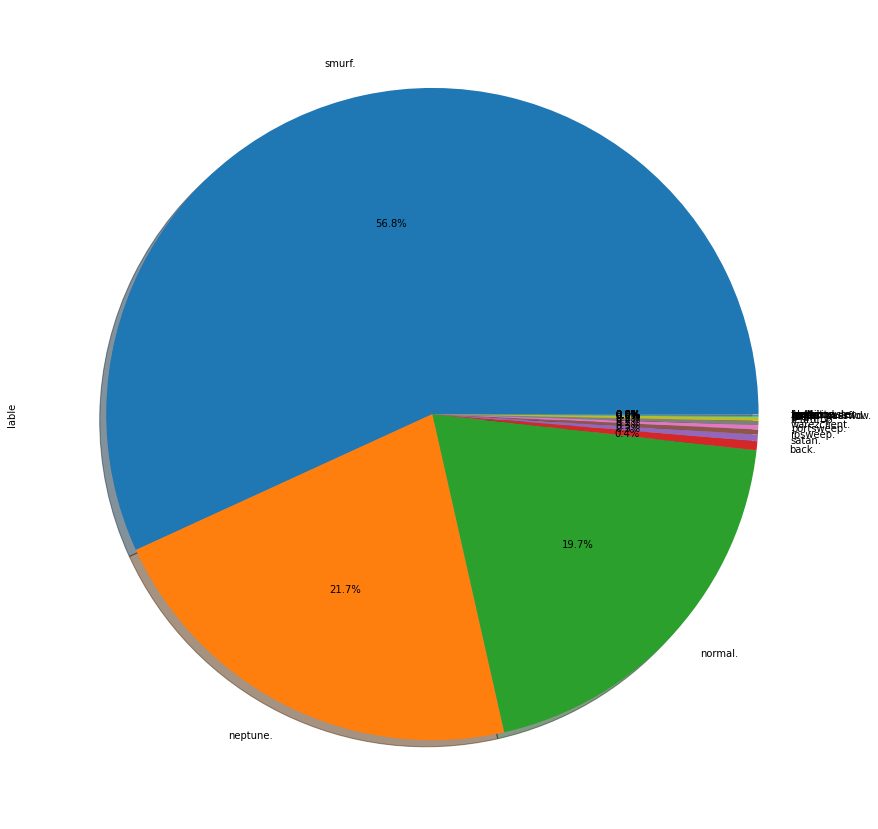

In [ ]:
train['lable'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(20,15))
plt.show()

<h1>Using the column name from this link : </h1> <a>http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types </a></br>
we turned the lables to be one of 5 values normal,DOS,R2L,U2R and probing. 
and this is prefe intro for the types:</br>
normal: normal traffic without malware </br>
DOS: denial-of-service, e.g. syn flood;</br>
R2L: unauthorized access from a remote machine, e.g. guessing password;</br>
U2R:  unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks;</br>
probing: surveillance and other probing, e.g., port scanning.
Source <a>http://kdd.ics.uci.edu/databases/kddcup99/task.html</a>

In [606]:
train['lable'] = train['lable'].replace(['normal.'], '0') 
train['lable'] = train['lable'].replace(['back.' ,'land.','neptune.','pod.','smurf.','teardrop.'], '1') 
train['lable'] = train['lable'].replace(['buffer_overflow.' ,'loadmodule.','perl.','rootkit.'], '2') 
train['lable'] = train['lable'].replace(['ftp_write.' ,'guess_passwd.','imap.','multihop.','phf.','spy.','warezclient.','warezmaster.'], '3') 
train['lable'] = train['lable'].replace(['ipsweep.' ,'nmap.','portsweep.','satan.' ], '4') 


In [ ]:
train['lable'].value_counts()

1    391458
0     97277
4      4107
3      1126
2        52
Name: lable, dtype: int64

In [607]:
encoder = LabelEncoder()
# extract categorical attributes from both training and test sets 
cat = train.select_dtypes(include=['object']).copy()
# encode the categorical attributes
traincat = cat.apply(encoder.fit_transform)
# separate target column from encoded data 
enctrain = traincat.drop(['lable'], axis=1)
enctrain.shape
# extract numerical attaributes and scale it to have zero mean and unit variance  
numname = train.select_dtypes(include=['float64','int64']).columns
num=train[numname]
final_train=pd.concat([num,traincat],axis=1,ignore_index=True).dropna()

scaler = MinMaxScaler()
X=final_train.iloc[:,:-1]
y=final_train.iloc[:,-1]
X=pd.DataFrame(scaler.fit_transform(X),columns=final_train.columns[:-1])
final_train=pd.concat([X,y],axis=1,ignore_index=True).dropna()


In [438]:
final_train.loc[:,41].value_counts()

1.0    391458
0.0     97276
4.0      4107
3.0      1126
2.0        52
Name: 41, dtype: int64

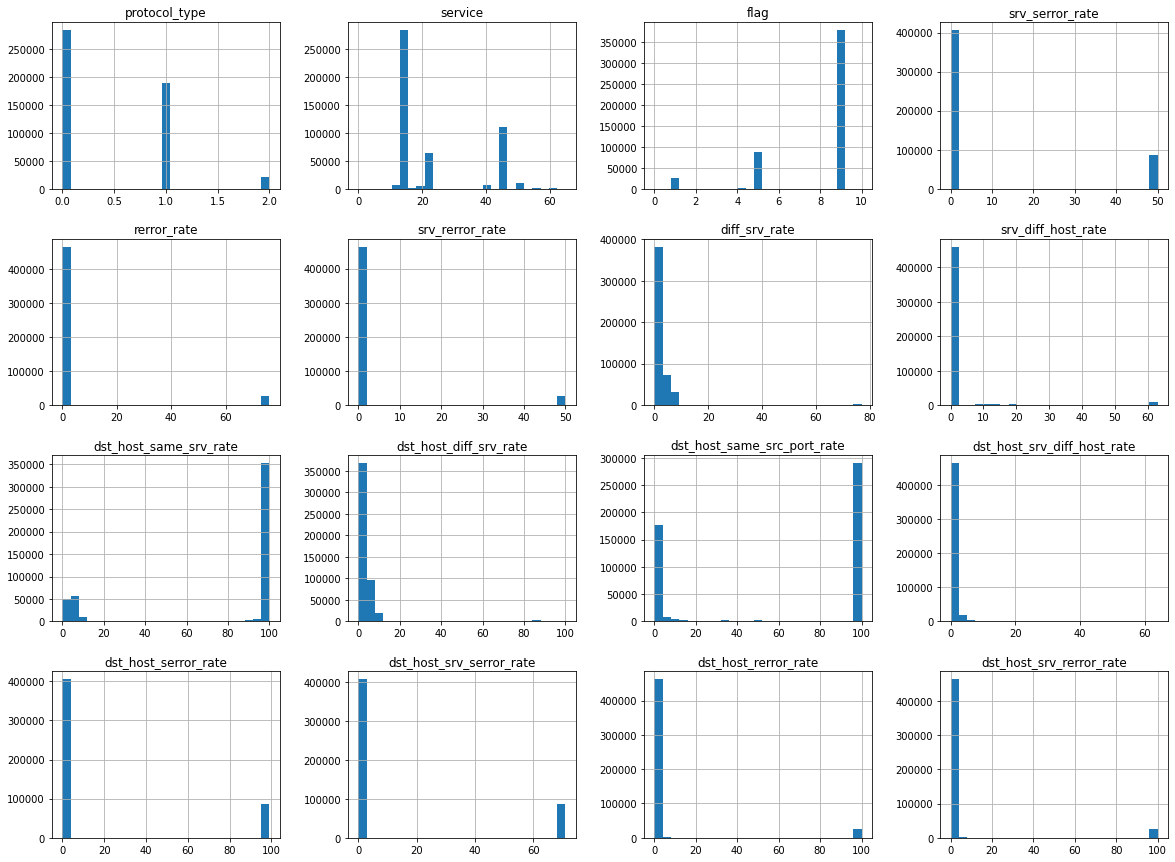

In [ ]:
num.hist(bins=25, figsize=(20,15))
plt.show()

In [539]:
final_train

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
1,0.0,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,1.0,0.0,0.03,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.0,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,1.0,0.0,0.03,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,1.0,0.0,0.02,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,1.0,0.0,0.02,0.000000,0.000000,0.000000,0.0,0.0,0.0
5,0.0,3.057506e-07,0.000376,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.000000,1.0,0.0,1.00,0.062500,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0.0,4.470881e-07,0.000365,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.603175,1.0,0.0,0.01,0.078125,0.000000,0.014085,0.0,0.0,0.0
494016,0.0,4.067060e-07,0.000443,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,1.0,0.0,0.17,0.078125,0.000000,0.014085,0.0,0.0,0.0
494017,0.0,2.927706e-07,0.000233,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.269841,1.0,0.0,0.06,0.078125,0.060606,0.014085,0.0,0.0,0.0
494018,0.0,4.196859e-07,0.000233,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.269841,1.0,0.0,0.04,0.078125,0.040404,0.014085,0.0,0.0,0.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train=scaler.fit_transform(X_train)
X_train=scaler.transform(X_train)

In [ ]:
dt_model =  DecisionTreeClassifier()
rf_model = RandomForestClassifier( n_jobs=-1)
ada_boost_model = AdaBoostClassifier()
bagging_model = BaggingClassifier()
extra_trees_model = ExtraTreesClassifier()
ensemble_clf=[ dt_model, rf_model, ada_boost_model, 
       bagging_model,extra_trees_model,]

In [ ]:
def predect(model,X_train, y_train,X_test, y_test):
    model.fit(X_train, y_train)

    #Scoring the model on train data
    print("Training Accuracy :\t ", model.score(X_train, y_train))

    #Scoring the model on test_data
    print("Testing Accuracy :\t  ",  model.score(X_test, y_test))

    y_pred = model.predict(X_test)
    scc=accuracy_score(y_test, y_pred)
    print(scc)
    #print('ROC-AUC score', roc_auc_score(y_test,y_pred))
    print('classification report:\n ',classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)

    sns.heatmap(conf_matrix, annot=True, fmt="3g")
    plt.show()
    return y_pred,scc

#############################DecisionTreeClassifier#############################
Training Accuracy :	  0.9999848939403553
Testing Accuracy :	   0.999503149785005
0.999503149785005
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     32155
           1       1.00      1.00      1.00    129132
           2       0.63      0.71      0.67        17
           3       0.97      0.95      0.96       388
           4       0.99      0.99      0.99      1335

    accuracy                           1.00    163027
   macro avg       0.92      0.93      0.92    163027
weighted avg       1.00      1.00      1.00    163027



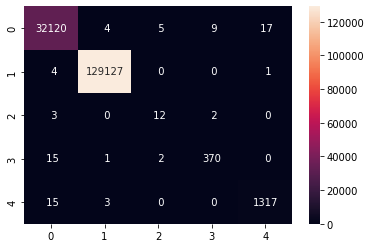

#############################RandomForestClassifier#############################
Training Accuracy :	  0.9999848939403553
Testing Accuracy :	   0.9997362400093236
0.9997362400093236
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     32155
           1       1.00      1.00      1.00    129132
           2       1.00      0.71      0.83        17
           3       1.00      0.94      0.97       388
           4       1.00      0.99      1.00      1335

    accuracy                           1.00    163027
   macro avg       1.00      0.93      0.96    163027
weighted avg       1.00      1.00      1.00    163027



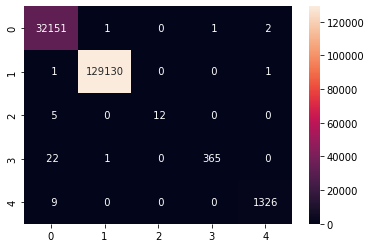

#############################AdaBoostClassifier#############################
Training Accuracy :	  0.41928379150012235
Testing Accuracy :	   0.41800437964263587
0.41800437964263587


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report:
                precision    recall  f1-score   support

           0       0.25      0.99      0.40     32155
           1       1.00      0.28      0.43    129132
           2       0.00      0.00      0.00        17
           3       0.56      0.04      0.07       388
           4       0.62      0.65      0.63      1335

    accuracy                           0.42    163027
   macro avg       0.49      0.39      0.31    163027
weighted avg       0.85      0.42      0.43    163027



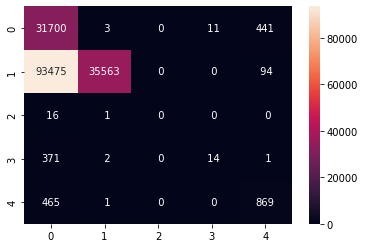

#############################BaggingClassifier#############################
Training Accuracy :	  0.9999516606091368
Testing Accuracy :	   0.9995951590840781
0.9995951590840781
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     32155
           1       1.00      1.00      1.00    129132
           2       0.81      0.76      0.79        17
           3       0.99      0.94      0.96       388
           4       0.99      0.99      0.99      1335

    accuracy                           1.00    163027
   macro avg       0.96      0.94      0.95    163027
weighted avg       1.00      1.00      1.00    163027



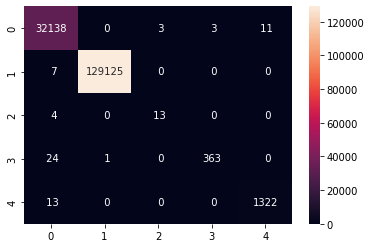

#############################ExtraTreesClassifier#############################
Training Accuracy :	  0.9999909363642131
Testing Accuracy :	   0.9997055702429659
0.9997055702429659
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     32155
           1       1.00      1.00      1.00    129132
           2       0.80      0.71      0.75        17
           3       0.99      0.94      0.97       388
           4       1.00      0.99      0.99      1335

    accuracy                           1.00    163027
   macro avg       0.96      0.93      0.94    163027
weighted avg       1.00      1.00      1.00    163027



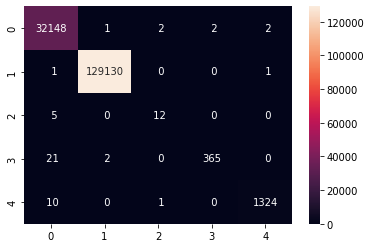

In [744]:
for i in range(len(ensemble_clf)):

        print('#############################'+str(type(ensemble_clf[i]).__name__)+'#############################')
        ypred,acc=predect(ensemble_clf[i],X_train, Y_train,X_test, Y_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

rnd_clf = RandomForestClassifier(n_jobs=-1,random_state=42)
rnd_clf.fit(X_train, Y_train)
x, y = (list(x) for x in zip(*sorted(zip(rnd_clf.feature_importances_, final_train.columns), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 600, height = 1000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,

    ),
    margin=dict(
    l=300,
),
)

fig1 = go.Figure(data=[trace2], layout=layout)
iplot(fig1)

In [ ]:
s=[]
for name, importance in zip(final_train.columns, rnd_clf.feature_importances_):
    if importance > 0.030 :
      s.append(name)
      print('"' + name + '"'+',')


"src_bytes",
"dst_bytes",
"logged_in",
"count",
"srv_count",
"dst_host_count",
"protocol_type",
"diff_srv_rate",
"dst_host_srv_diff_host_rate",


In [ ]:
final_train2=final_train.loc[:,s]

In [ ]:
final_train2

,src_bytes,dst_bytes,logged_in,count,srv_count,dst_host_count,protocol_type,diff_srv_rate,dst_host_srv_diff_host_rate
1,239,486,1,8,8.0,19,1,0,0
2,235,1337,1,8,8.0,29,1,0,0
3,219,1337,1,6,6.0,39,1,0,0
4,217,2032,1,6,6.0,49,1,0,0
5,217,2032,1,6,6.0,59,1,0,0
...,...,...,...,...,...,...,...,...,...
494016,310,1881,1,4,5.0,86,1,0,5
494017,282,2286,1,6,6.0,6,1,0,5
494018,203,1200,1,6,18.0,16,1,0,5
494019,291,1200,1,6,12.0,26,1,0,5


In [ ]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(final_train2, y, test_size=0.33, random_state=42)




#############################DecisionTreeClassifier#############################
Training Accuracy :	  0.9996978788071047
Testing Accuracy :	   0.998883620504579
0.998883620504579
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     32155
           1       1.00      1.00      1.00    129132
           2       0.53      0.59      0.56        17
           3       0.96      0.96      0.96       388
           4       0.95      0.97      0.96      1335

    accuracy                           1.00    163027
   macro avg       0.89      0.90      0.89    163027
weighted avg       1.00      1.00      1.00    163027



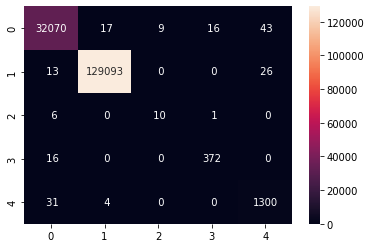

#############################RandomForestClassifier#############################
Training Accuracy :	  0.9996978788071047
Testing Accuracy :	   0.9990921749158115
0.9990921749158115
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     32155
           1       1.00      1.00      1.00    129132
           2       1.00      0.41      0.58        17
           3       0.98      0.95      0.96       388
           4       0.96      0.97      0.97      1335

    accuracy                           1.00    163027
   macro avg       0.99      0.87      0.90    163027
weighted avg       1.00      1.00      1.00    163027



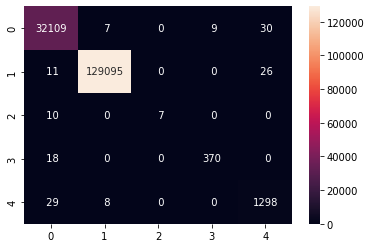

#############################AdaBoostClassifier#############################
Training Accuracy :	  0.95754592997435
Testing Accuracy :	   0.9585222079778196
0.9585222079778196
classification report:
                precision    recall  f1-score   support

           0       0.94      0.86      0.90     32155
           1       0.99      0.99      0.99    129132
           2       0.00      0.00      0.00        17
           3       1.00      0.00      0.01       388
           4       0.41      0.28      0.33      1335

    accuracy                           0.96    163027
   macro avg       0.67      0.43      0.45    163027
weighted avg       0.98      0.96      0.97    163027



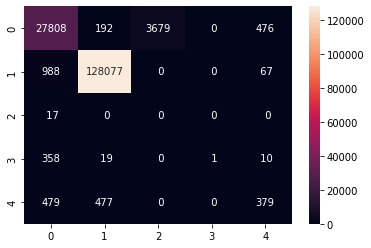

#############################BaggingClassifier#############################
Training Accuracy :	  0.9996314121446677
Testing Accuracy :	   0.9989756298036522
0.9989756298036522
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     32155
           1       1.00      1.00      1.00    129132
           2       0.53      0.59      0.56        17
           3       0.98      0.95      0.97       388
           4       0.95      0.97      0.96      1335

    accuracy                           1.00    163027
   macro avg       0.89      0.90      0.90    163027
weighted avg       1.00      1.00      1.00    163027



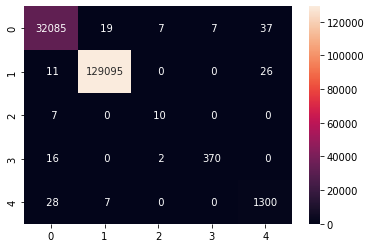

#############################ExtraTreesClassifier#############################
Training Accuracy :	  0.9996978788071047
Testing Accuracy :	   0.9988774865513075
0.9988774865513075
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     32155
           1       1.00      1.00      1.00    129132
           2       0.71      0.29      0.42        17
           3       0.95      0.92      0.93       388
           4       0.96      0.97      0.96      1335

    accuracy                           1.00    163027
   macro avg       0.92      0.84      0.86    163027
weighted avg       1.00      1.00      1.00    163027



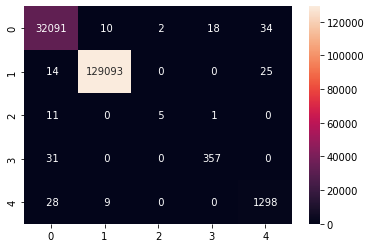

In [ ]:
for i in range(len(ensemble_clf)):

        print('#############################'+str(type(ensemble_clf[i]).__name__)+'#############################')
        ypred,acc=predect(ensemble_clf[i],X_train2, Y_train2,X_test2, Y_test2)

# Champion model RandomForestClassifier with 96 %   F1 score macro avg

Training Accuracy :	  0.9999848939403553
Testing Accuracy :	   0.9997607758224097
0.9997607758224097
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     32155
           1       1.00      1.00      1.00    129132
           2       1.00      0.71      0.83        17
           3       1.00      0.94      0.97       388
           4       1.00      0.99      1.00      1335

    accuracy                           1.00    163027
   macro avg       1.00      0.93      0.96    163027
weighted avg       1.00      1.00      1.00    163027



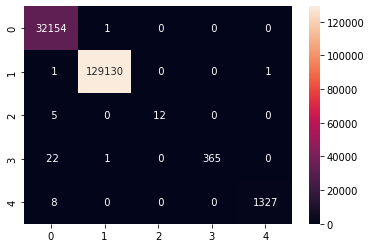

(array([1, 1, 1, ..., 0, 1, 1]), 0.9997607758224097)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import roc_curve,accuracy_score,confusion_matrix,recall_score,precision_score,f1_score, auc, roc_auc_score,classification_report
import seaborn as sns

rf_model = RandomForestClassifier( n_jobs=-1)
predect(rf_model,X_train, Y_train,X_test, Y_test)

# Now we will try to see the effect of CTgan on our champion model 

In [440]:
class KddDAtareader(Dataset):
    
    def __init__(self ,Data,labelnum,label=None):
        self.Data=Data
        self.label=label
        self.labelnum=labelnum 
        if self.label!= None:
            print('hi')
            self.Data=self.Data.loc[self.Data.loc[:,self.labelnum]==self.label]
    def __len__(self):
        return len(self.Data)
    def __getitem__(self,idx):

        return torch.from_numpy(np.array(self.Data.iloc[idx, :-1].values)), torch.tensor(float(self.Data.iloc[idx,-1]))
        


In [542]:
encoder = LabelEncoder()

DataSet=KddDAtareader(final_train,final_train.shape[1]-1,0)

hi


In [543]:
len(DataSet)

97276

In [544]:
params = {'batch_size': 1064,
          'shuffle': True}


traindl = DataLoader(DataSet, **params) 


In [559]:
class disc(nn.Module):
    def __init__(self):
        super(disc, self).__init__()
        #nn.Conv1d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
        self.conv1=nn.Linear(41,64,)
        self.conv2=nn.Linear(64,128,)
        self.conv3=nn.Linear(128,265)
        self.conv4=nn.Linear(265,512)
        self.fc=nn.Linear(512,1)
    def forward(self,x):
        x=F.relu(self.conv1(x))
        x=F.relu(self.conv2(x))
        x=F.relu(self.conv3(x))
        x=F.relu(self.conv4(x))
        
        x=torch.sigmoid(self.fc(x))
        return x

In [561]:
class gen(nn.Module):
    def __init__(self,):
        super(gen, self).__init__()

        self.conv1=nn.Linear(41,64)
        
        self.conv4=nn.Linear(64,32)
        self.conv5=nn.Linear(32,41)

    def forward(self,x):
        x=F.relu(self.conv1(x))

        x=F.relu(self.conv4(x))
        x=F.relu(self.conv5(x))
        
        return x

In [562]:
def Update_disc(X,Z,net_D,net_G,loss,trainer_D):
    """X is the original Featur 
       Z is the noise for the Genaretor 
       loss the loss 
       TRinear_D 
       """
    batch_size= X.shape[0]
    ones = torch.ones((batch_size,), device=X.device)
    zeros=torch.zeros((batch_size,),device=X.device)
    trainer_D.zero_grad()
    real_Y=net_D(X.float())
    Fake_X=net_G(Z.float())
    fake_Y = net_D(Fake_X.detach())

    Loss_D=((loss(real_Y.view(-1),ones.reshape(real_Y.shape[0])))+(loss(fake_Y.view(-1),zeros.reshape(fake_Y.shape[0])))/2)
    Loss_D.backward()
    trainer_D.step()
    return Loss_D

In [563]:
def update_gen(Z,net_D,net_G,loss,trainer_G):
    batch_size= Z.shape[0]
    ones = torch.ones((batch_size,), device=Z.device)
    trainer_G.zero_grad()
    fake_X = net_G(Z.float())
    fake_Y = net_D(fake_X.float())
    loss_G = loss(fake_Y.view(-1), ones.reshape(fake_Y.shape[0]))
    loss_G.backward()
    trainer_G.step()
    return loss_G

In [564]:
def training(net_D,net_G,data_iter, num_epochs, lr_D, lr_G,latent_dim):
    loss = nn.BCEWithLogitsLoss(reduction='sum')
    for w in net_D.parameters():
        nn.init.normal_(w, 0, 0.2)
    for w in net_G.parameters():
        nn.init.normal_(w, 0, 0.2)
    trainer_D = torch.optim.Adam(net_D.parameters(), lr=lr_D, weight_decay=0.001)
    trainer_G = torch.optim.Adam(net_G.parameters(), lr=lr_G, weight_decay=0.001)
    G_loss=[]
    D_loss=[]
    for epoch in range(num_epochs):
        # Train one epoch
       
        d_loss = 0.0
        g_loss = 0.0

        for (X,_) in data_iter:
            batch_size = X.shape[0]
            
            Z = torch.normal(0, 1, size=(batch_size, latent_dim))
            d_loss+=Update_disc(X, Z, net_D, net_G, loss, trainer_D).item()
            g_loss+=update_gen(Z, net_D, net_G, loss, trainer_G).item()

        D_loss.append(d_loss/len(X))
        G_loss.append(g_loss/len(X))
        print(f'D_loss = {d_loss} ,G_loss = {g_loss}')


        # Show the losses
        
    plt.figure(figsize=(10,5))
    plt.title("Training and Validation Loss")
    plt.plot(D_loss,label="D_loss")
    plt.plot(G_loss,label="G_loss")
    plt.xlabel("iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show() 
    return net_D, net_G

In [565]:
net_D = disc().to(divse())
net_G = gen().to(divse())

Using device cpu
Using device cpu


D_loss = 65388.65377807617 ,G_loss = 67319.85311889648
D_loss = 64191.42794799805 ,G_loss = 67425.78475952148
D_loss = 64189.23080444336 ,G_loss = 67424.57376098633
D_loss = 64186.928802490234 ,G_loss = 67426.34860229492
D_loss = 64186.79867553711 ,G_loss = 67426.24380493164
D_loss = 64186.37045288086 ,G_loss = 67426.37045288086
D_loss = 64186.174224853516 ,G_loss = 67426.60134887695
D_loss = 64186.14767456055 ,G_loss = 67426.60232543945
D_loss = 64186.14730834961 ,G_loss = 67426.60232543945
D_loss = 64186.22830200195 ,G_loss = 67426.58401489258


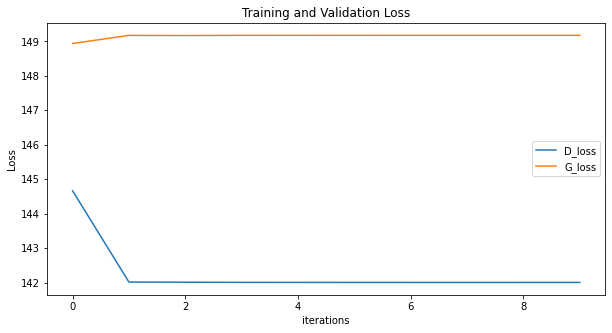

In [566]:
lr_D, lr_G, latent_dim, num_epochs = 0.01, 0.0001, 41,10
net_D1, net_G1=training(net_D, net_G, traindl, num_epochs, lr_D, lr_G,
      latent_dim,)

In [694]:
Z = torch.normal(0, 1, size=(100000, 41))
hhhh=net_G1(Z)
hhhh[:1]

tensor([[0.2901, 0.9798, 0.4576, 0.3344, 0.0000, 0.2351, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.8977, 0.8913, 0.0000, 0.0000, 0.0000,
         1.1080, 0.0000, 1.0746, 0.5787, 0.0000, 0.0000, 0.3312, 0.0000, 0.5348,
         0.0000, 0.0699, 0.0000, 0.0000, 0.0000, 0.0000, 1.4210, 0.0000, 0.3702,
         0.0000, 0.0000, 0.7281, 0.0000, 0.0000]], grad_fn=<SliceBackward0>)

In [597]:
kkkd=final_train.loc[final_train.loc[:,41]==0]

In [598]:
kkkd=torch.from_numpy(np.array(kkkd.iloc[:64,:-1]))

In [631]:
Xtest2=torch.from_numpy(np.array(X_test))

In [665]:
np.array(net_D1(hhhh.detach().float())>.5).sum()/len(hhhh)

0.0

In [664]:
np.array(net_D1(Xtest2.detach().float())>.5).sum()/len(Xtest2)

0.9998589190747544

In [695]:
labels = np.ones(len(hhhh.detach().numpy()))


In [705]:
hhhh.detach().numpy().shape

(100000, 41)

In [696]:
out = np.concatenate([hhhh.detach().numpy(), labels.reshape(-1,1)], axis=1)
out2 = np.concatenate([X_test, np.array(Y_test).reshape(-1,1)], axis=1)


In [697]:
newX_test=np.concatenate([out,out2])

In [698]:
y2=newX_test[:,-1]
X2=newX_test[:,:-1]

0.6379231029514081
classification report:
                precision    recall  f1-score   support

         0.0       0.25      1.00      0.40     32155
         1.0       1.00      0.58      0.74    229132
         2.0       1.00      0.71      0.83        17
         3.0       1.00      0.94      0.97       388
         4.0       0.81      0.99      0.89      1335

    accuracy                           0.64    263027
   macro avg       0.81      0.85      0.77    263027
weighted avg       0.91      0.64      0.70    263027



<AxesSubplot:>

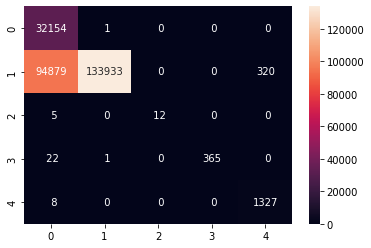

In [737]:
y_pred = rf_model.predict(X2).astype(int)
scc=accuracy_score(y2,y_pred)
print(scc)
#print('ROC-AUC score', roc_auc_score(y_test,y_pred))
conf_matrix = confusion_matrix(y2,y_pred)
#print('ROC-AUC score', roc_auc_score(y_test,y_pred))
print('classification report:\n ',classification_report(y2,y_pred))
sns.heatmap(conf_matrix, annot=True, fmt="3g")

In [701]:
Xtest3=torch.from_numpy(np.array(X2))

In [ ]:
dis=np.array(net_D1(Xtest3.detach().float())>.5)
print (np.unique(dis, return_counts=True))
dis=dis.reshape (-1)

(array([False,  True]), array([100023, 163004]))


In [733]:
newX_test1=pd.DataFrame(newX_test)
newX_test1=newX_test1.loc[dis]
newX_test1


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
100000,0.0,1.488371e-06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,1.00,0.00,1.00,0.00000,0.0,0.0,0.0,0.0,1.0
100001,0.0,1.488371e-06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,1.00,0.00,1.00,0.00000,0.0,0.0,0.0,0.0,1.0
100002,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.02,0.08,0.00,0.00000,1.0,1.0,0.0,0.0,1.0
100003,0.0,5.062191e-07,0.001658,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00000,1.00,0.00,0.01,0.03125,0.0,0.0,0.0,0.0,0.0
100004,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.03,0.07,0.00,0.00000,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263022,0.0,1.488371e-06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,1.00,0.00,1.00,0.00000,0.0,0.0,0.0,0.0,1.0
263023,0.0,1.488371e-06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,1.00,0.00,1.00,0.00000,0.0,0.0,0.0,0.0,1.0
263024,0.0,4.139171e-07,0.000864,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.52381,1.00,0.00,0.00,0.00000,0.0,0.0,0.0,0.0,0.0
263025,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.01,0.06,0.00,0.00000,1.0,1.0,0.0,0.0,1.0


In [734]:
y3=newX_test1.iloc[:,-1]
X3=newX_test1.iloc[:,:-1]

0.9997607420676793
classification report:
                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     32155
         1.0       1.00      1.00      1.00    129116
         2.0       1.00      0.71      0.83        17
         3.0       1.00      0.94      0.97       382
         4.0       1.00      0.99      1.00      1334

    accuracy                           1.00    163004
   macro avg       1.00      0.93      0.96    163004
weighted avg       1.00      1.00      1.00    163004



<AxesSubplot:>

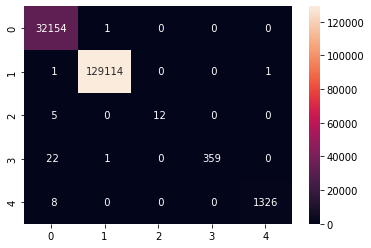

In [739]:
y_pred = rf_model.predict(X3).astype(int)
scc=accuracy_score(y3,y_pred)
print(scc)
#print('ROC-AUC score', roc_auc_score(y_test,y_pred))
conf_matrix = confusion_matrix(y3,y_pred)
print('classification report:\n ',classification_report(y3,y_pred))

sns.heatmap(conf_matrix, annot=True, fmt="3g")